In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.tsatools import add_trend
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [14]:
plt.rcParams['figure.dpi'] = 3000

In [15]:
df = pd.read_csv("../../data/csv/maunaloa.csv")
fig = df.plot("Date", "CO2")


In [5]:
df = add_trend(df, trend='ctt')
df.head()

Date     CO2  TIME  const  trend  trend_squared
0  1964-01-01  322.23     0    1.0    1.0            1.0
1  1964-02-01  321.89     1    1.0    2.0            4.0
2  1964-03-01  320.44     2    1.0    3.0            9.0
3  1964-04-01  318.70     3    1.0    4.0           16.0
4  1964-05-01  316.70     4    1.0    5.0           25.0

In [6]:
res = smf.ols('CO2 ~ TIME', data=df).fit()

In [7]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 2.379e+04
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:36:13   Log-Likelihood:                -1128.7
No. Observations:                 488   AIC:                             2261.
Df Residuals:                     486   BIC:                             2270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    316.1023      0.221   1427.355      0.000     315.667     316.537
TIME           0.1214      0.001    154.243      0.000       0.120       0.123
==============================================================================
Omnibus:                       18.125   Durbin-Watson:                   0.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.598
Skew:                          -0.049   Prob(JB):                       0.0136
Kurtosis:                       2.357   Cond. No.                         562.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


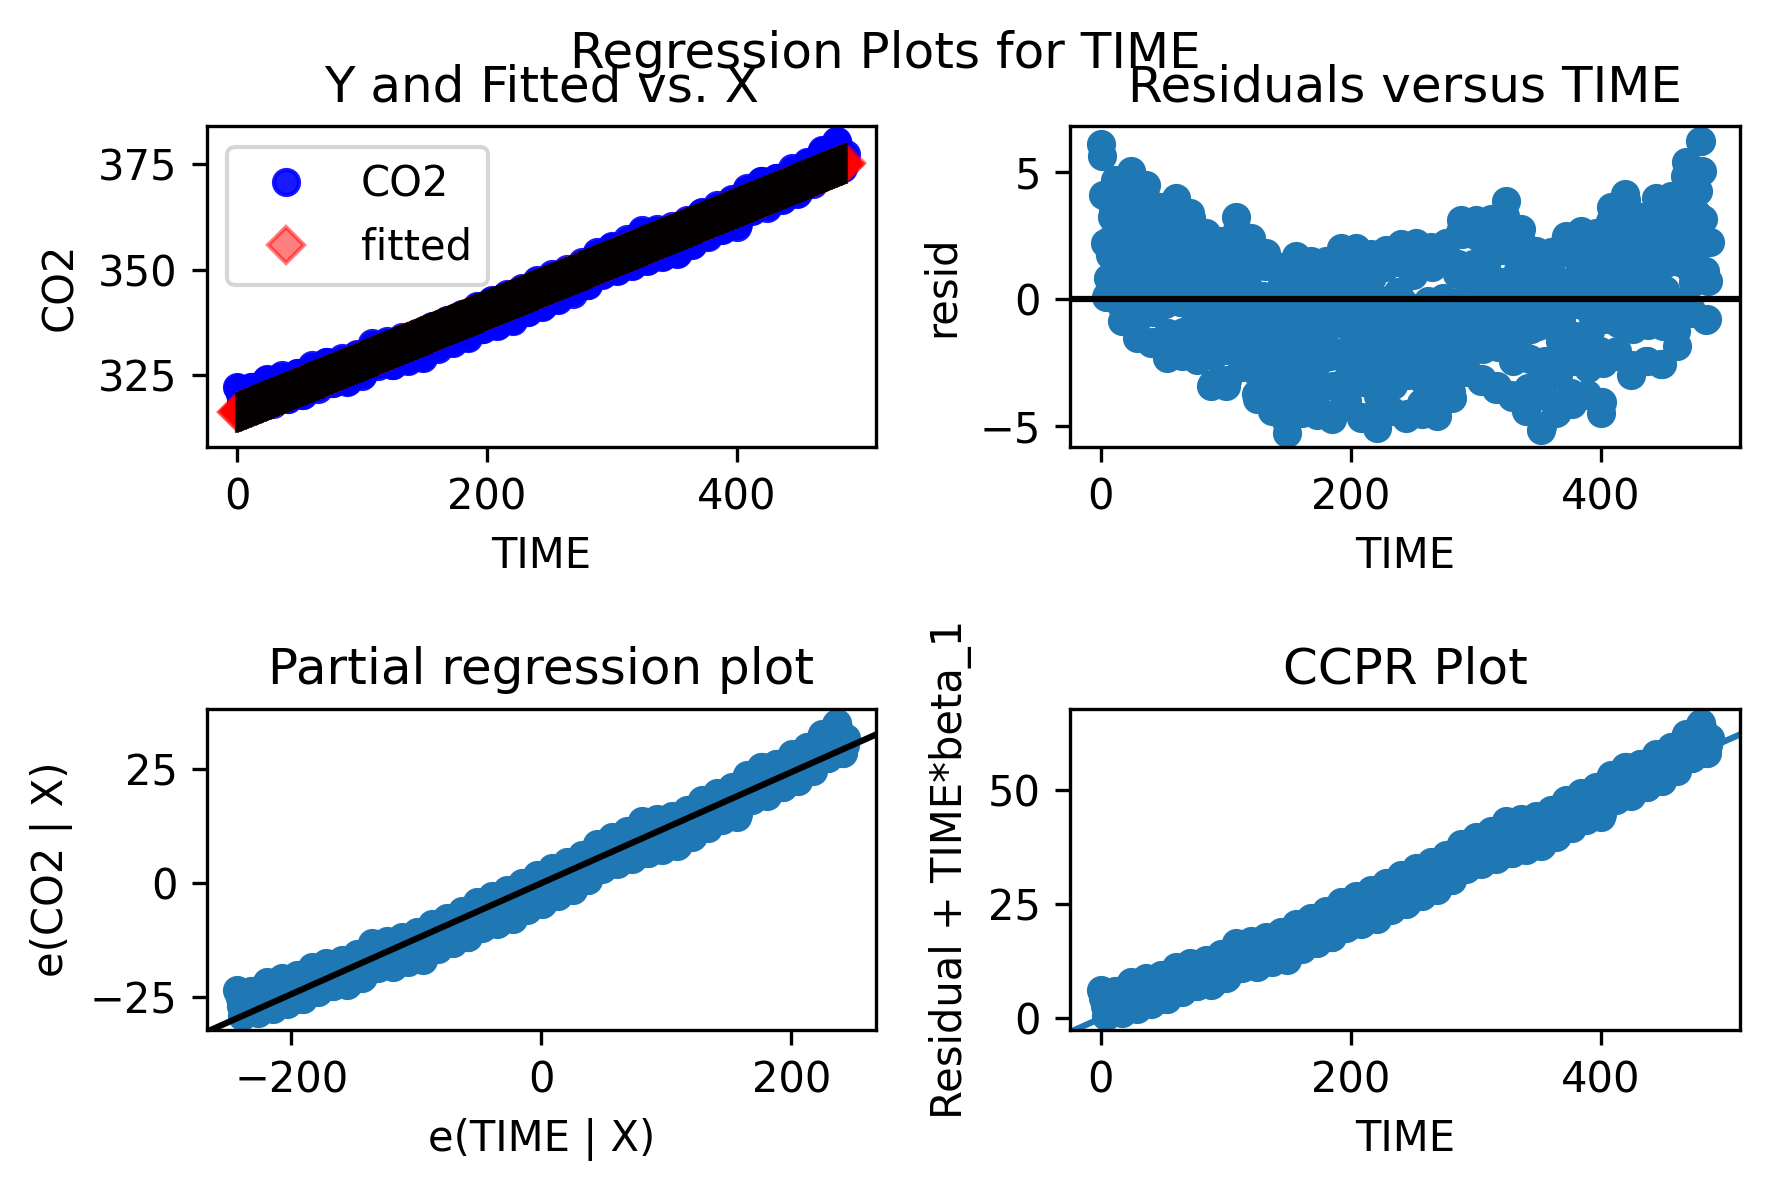

In [12]:
fig = sm.graphics.plot_regress_exog(res, "TIME")

In [16]:
fig = sm.graphics.plot_fit(res, "TIME")
fig.tight_layout(pad=1.0)